In [85]:
#Importing necessary packages
import googlemaps
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
gmaps = googlemaps.Client(key='key')

In [46]:
#Collecting data on restaurants nearby coworking spaces (within 2000 meters) using Google Maps API
request = gmaps.places_nearby(location = ('39.759472294210816, -86.15800378629093'), radius = 2000, keyword='restaurant')
res = len(request['results'])
results = request['results']
lat_ = []
lng_ = []
name_ = []
rating_ = []

for i in range(0,res):
    lat = results[i]['geometry']['location']['lat']
    lng = results[i]['geometry']['location']['lng'] 
    name = results[i]['name']
    rating = results[i]['rating']
    types = results[i]['types']
    lat_.append(lat)
    lng_.append(lng)
    name_.append(name)
    rating_.append(rating)
    types_.append(types)
results = pd.DataFrame(data={'lat':lat_,
                                'lng':lng_,
                                'name':name_,
                                'rating':rating_,
                                'types':types_})

In [31]:
#Creating master dataframe for analysis
column_names = ['lat','lng','name','rating','types']

master_results = pd.DataFrame(columns = column_names)

In [48]:
#Appending each search result to master dataframe
master_results=master_results.append(results)

In [64]:
#Exporting dataframe to create groups using Excel
master_results.to_csv('master_results.csv')

In [121]:
#Importing DataFrame back in 
df = pd.read_csv('master_results.csv')

,lat,lng,name,rating,types,Workspace
0,39.839502,-86.144806,Next Door American Eatery,4.9,"['restaurant', 'bar', 'food', 'point_of_intere...",The Speak Easy
1,39.850841,-86.145582,The Jazz Kitchen,4.7,"['bar', 'restaurant', 'food', 'point_of_intere...",The Speak Easy
2,39.846781,-86.146039,Red Key Tavern,4.6,"['bar', 'restaurant', 'food', 'point_of_intere...",The Speak Easy
3,39.862479,-86.145641,Ambrosia,4.7,"['bar', 'restaurant', 'food', 'point_of_intere...",The Speak Easy
4,39.862402,-86.146308,Binkley's KItchen and Bar,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...",The Speak Easy
...,...,...,...,...,...,...
95,39.766069,-86.158312,The Oceanaire Seafood Room,4.5,"['restaurant', 'food', 'point_of_interest', 'e...",Launch Indy
96,39.765467,-86.158689,Nada,4.4,"['bar', 'restaurant', 'food', 'point_of_intere...",Launch Indy
97,39.767605,-86.160065,Weber Grill Restaurant,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...",Launch Indy
98,39.766694,-86.161151,The Eagle's Nest,4.4,"['restaurant', 'food', 'point_of_interest', 'e...",Launch Indy


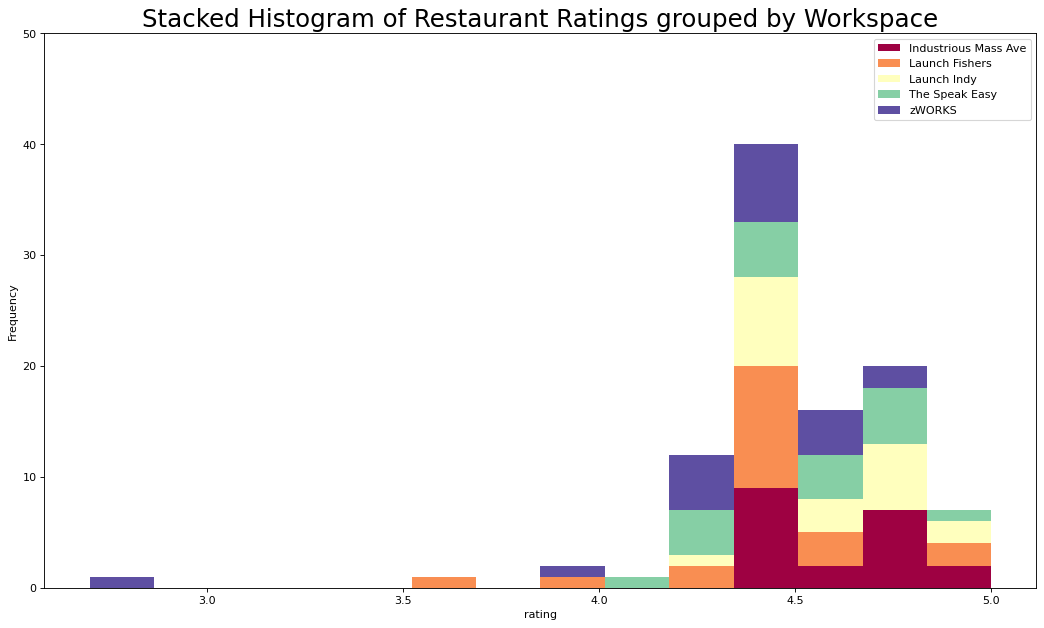

In [119]:
#Creating a stacked histogram to visually inspect the Star Ratings of restaurants within each locale
groupby_var = 'Workspace'
x_var = 'rating'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Stacked Histogram of Restaurant Ratings grouped by Workspace", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 50)
plt.show()

In [102]:
#Getting Average Restaurant Ratings for Each Workspace
average_ratings = df.groupby('Workspace')['rating'].mean()

<AxesSubplot:title={'center':'Average Rating of Restaurants Nearby'}, ylabel='Workspace'>

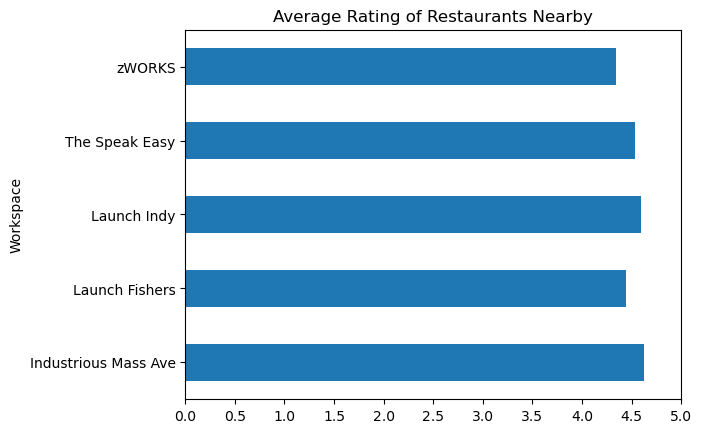

In [118]:
#Plotting the Average Rating of Restaurants by Workspace, we see that Industrious Mass Ave has the highest average restaurant 
#rating and is thus my recommendation
average_ratings.plot.barh(title = "Average Rating of Restaurants Nearby" , xticks = (0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5))

In [136]:
#Subsetting and sorting the Industrious Mass Ave restaurants to visit the 10 best locations over 10 weeks
mass_ave = df[df.Workspace == 'Industrious Mass Ave']
mass_ave = mass_ave.sort_values(by = 'rating')
mass_ave_keepers = mass_ave.tail(10)
mass_ave_keepers = mass_ave_keepers['name']
mass_ave_keepers = mass_ave_keepers.reset_index()
mass_ave_keepers

,index,name
0,73,Comida
1,76,Bluebeard
2,60,St. Elmo Steak House
3,78,Axum Ethiopian Restaurant
4,64,Harry & Izzy's
5,72,Livery
6,70,Vida
7,61,The Oakmont
8,71,Hinata Japanese Fine Dining
9,69,Subito
